In [34]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1 & 2
Setting-up Clenshaw Algorithm and doing Chebyshev Sum using Clenshaw

In [35]:
def chebyshev_sum_with_clenshaw(x, N):
    cheb_coeffs = {}
    cheb_polys = [0 for _ in range(N)]
    cheb_polys[0], cheb_polys[1] = 1, x
    for i in range(2, N):
        cheb_polys[i] = 2*x*cheb_polys[i-1] - cheb_polys[i-2]
        
    for j in range(N):
        cheb_coeffs[j] = 0
        for k in range(1, N+1):
            cheb_coeffs[j] += 2/N * np.exp(np.cos(np.pi/N * (k - 1/2))) * np.cos(np.pi/N * j * (k - 1/2))

    y_arr = [0 for _ in range(N+2)]
    for i in range(N-1, 0, -1):
        y_arr[i] = 2*x*y_arr[i+1] - y_arr[i+2] + cheb_coeffs[i]
    
    clen_sum = (-1)*(1)*y_arr[2] + (x)*y_arr[1] + (1)*cheb_coeffs[0]
    
    cheb_sum = clen_sum - cheb_coeffs[0]/2

    return cheb_sum

In [36]:
def chebyshev_sum_direct(x, N):
    cheb_coeffs = {}
    cheb_polys = [0 for _ in range(N)]
    cheb_polys[0], cheb_polys[1] = 1, x
    for i in range(2, N):
        cheb_polys[i] = 2*x*cheb_polys[i-1] - cheb_polys[i-2]
        
    for j in range(N):
        cheb_coeffs[j] = 0
        for k in range(1, N+1):
            cheb_coeffs[j] += 2/N * np.exp(np.cos(np.pi/N * (k - 1/2))) * np.cos(np.pi/N * j * (k - 1/2))

    cheb_sum = -(cheb_coeffs[0])/2
    for k in range(N):
        cheb_sum += cheb_coeffs[k]*cheb_polys[k]

    return cheb_sum

In [37]:
clenshaw_errors, direct_errors = [], []

In [38]:
def error_calc(N):
    x = np.linspace(-1, 1, 200)
    cheb_sums_clenshaw = [chebyshev_sum_with_clenshaw(xi, N) for xi in x]
    cheb_sums_direct = [chebyshev_sum_direct(xi, N) for xi in x]
    clenshaw_error = [abs(cheb_sums_clenshaw[i] - np.exp(x[i])) for i in range(200)]
    direct_error = [abs(cheb_sums_direct[i] - np.exp(x[i])) for i in range(200)]
    clenshaw_errors.append(max(clenshaw_error))
    direct_errors.append(max(direct_error))

In [39]:
for N in range(15, 45):
    error_calc(N)

Ns = [i for i in range(15, 45)]

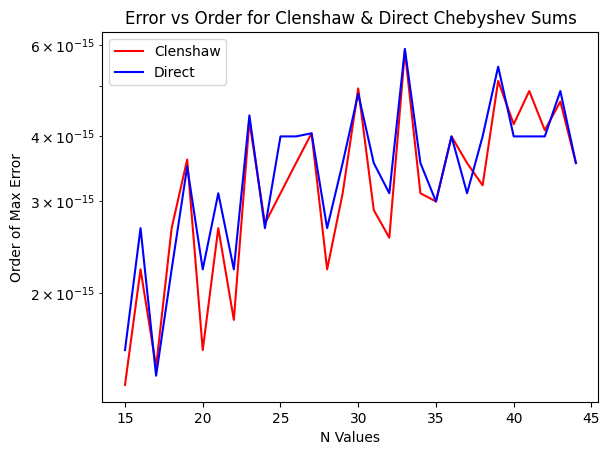

In [40]:
plt.semilogy(Ns, clenshaw_errors, 'r', label='Clenshaw')
plt.semilogy(Ns, direct_errors, 'b', label='Direct')
plt.xlabel("N Values")
plt.ylabel("Order of Max Error")
plt.title("Error vs Order for Clenshaw & Direct Chebyshev Sums")
plt.legend()